# Exploratory Data Analysis

# 1. Load Required Libraries

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as utils
import pandas as pd

# 2. Load Configuration File

In [57]:
config = utils.load_config()

# 3. Load Train Set

In [58]:
x_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

In [59]:
train_set = pd.concat([x_train, y_train], axis = 1)

In [60]:
train_set

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,Winner
3314,0,-1,-1,-1,0,1,0,-1,0,-5.08,-2.54,6,1
948,1,0,-1,-3,-2,-12,0,0,-3,2.54,0.00,-1,0
2342,1,-1,0,-1,-3,-1,0,-4,1,0.00,5.08,-2,0
3306,0,0,0,0,-1,-4,0,0,1,5.08,10.16,-5,1
306,1,-1,-1,-1,1,0,0,0,0,-5.08,0.00,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,0,1,1,1,0,3,0,0,0,0.00,0.00,4,1
1386,1,-3,3,9,3,33,2,2,0,-5.08,0.00,8,1
1449,0,0,0,0,0,0,0,0,0,-10.16,0.00,1,0
3522,0,0,0,-1,0,-5,0,0,0,5.08,-2.54,-3,0


# 4. Data Exploration

In [68]:
train_set['Winner'].value_counts(normalize=True)

1    0.58365
0    0.41635
Name: Winner, dtype: float64

Most of EDA done in Tableau Public.

It can be accessed [here](https://public.tableau.com/views/UFCDiffsAnalysis/Sheet212?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

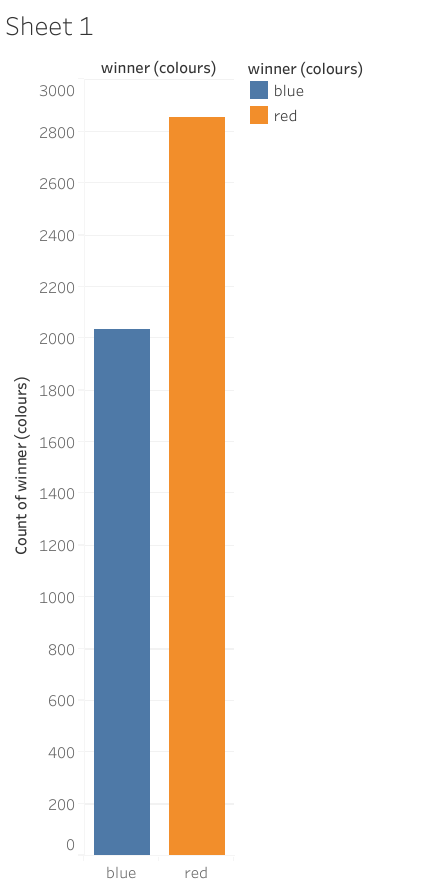

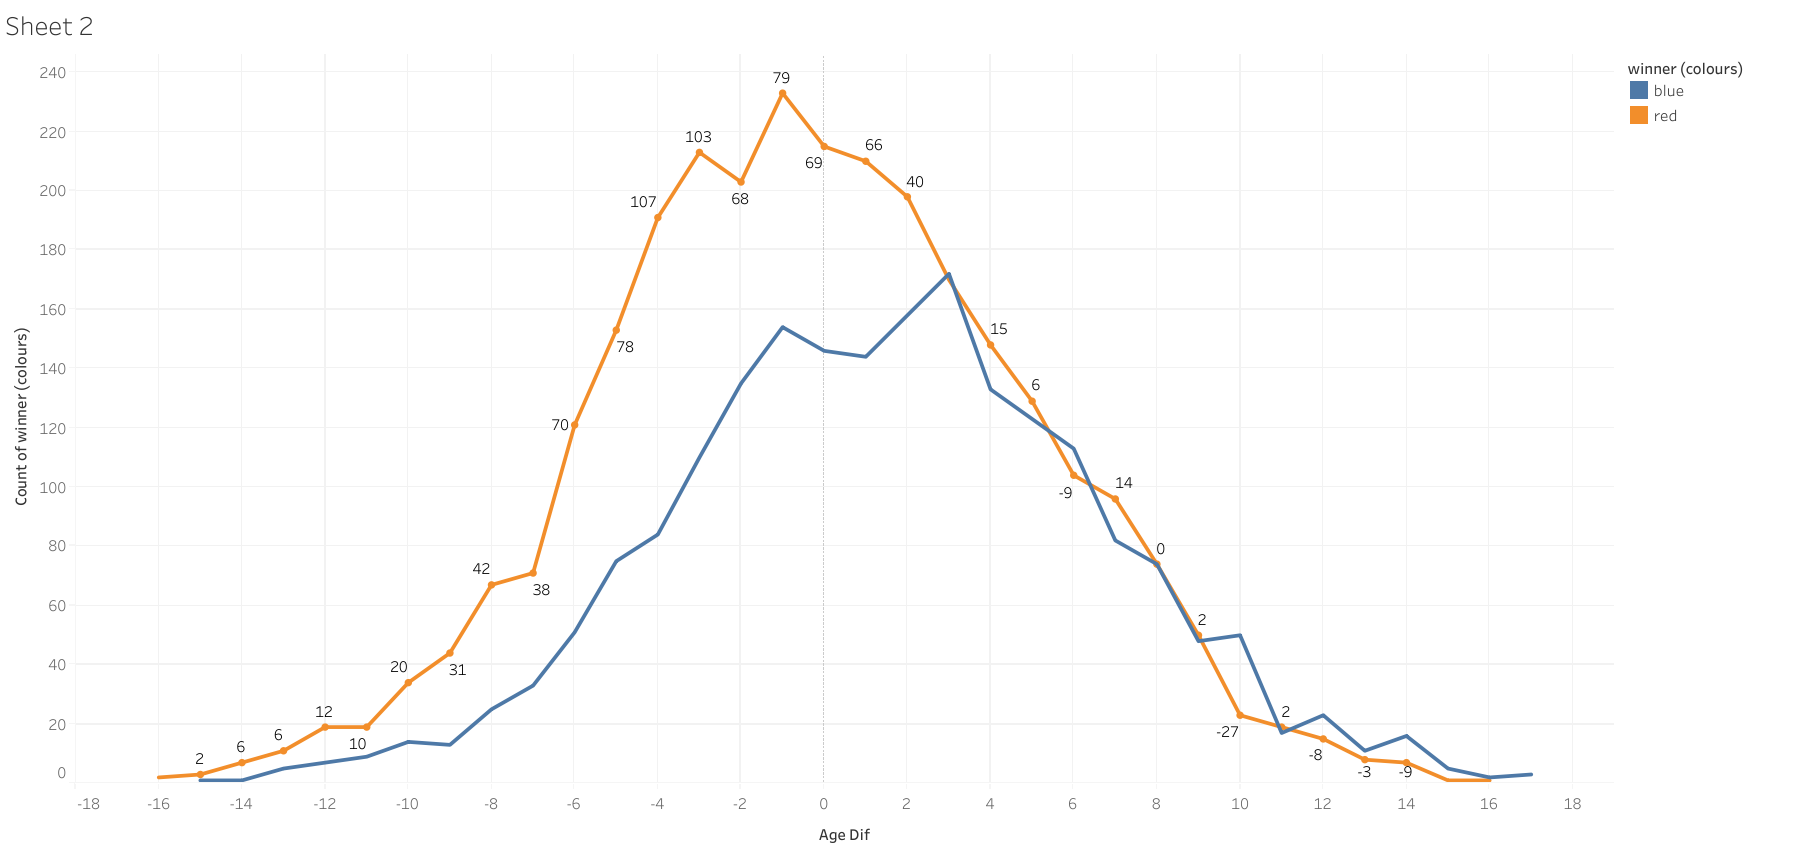

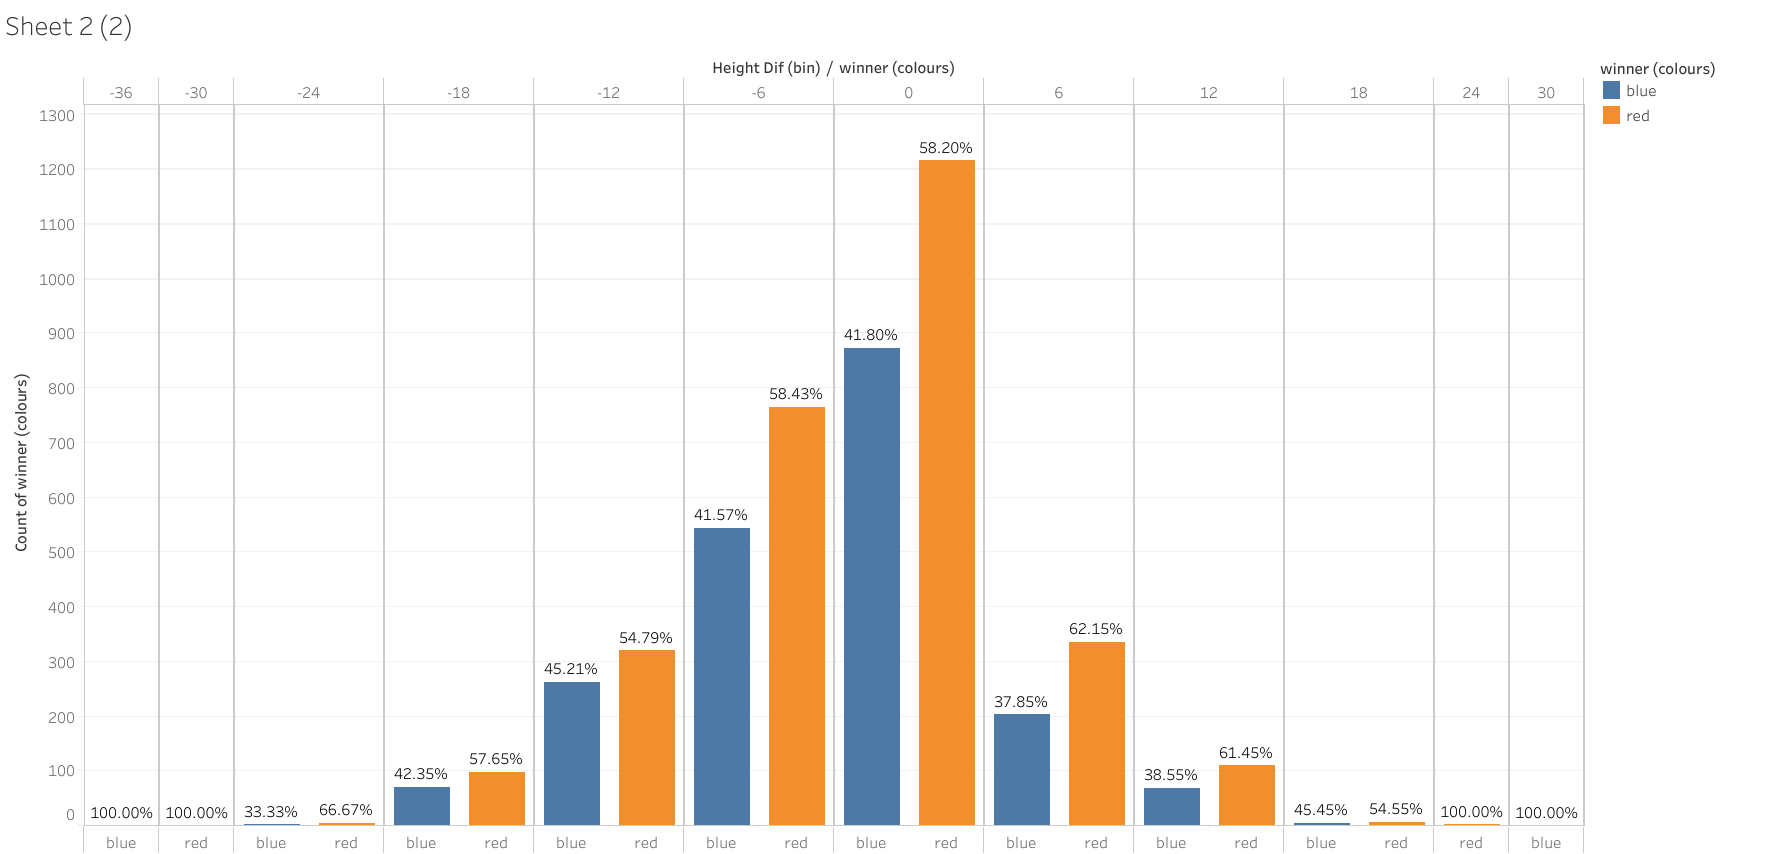

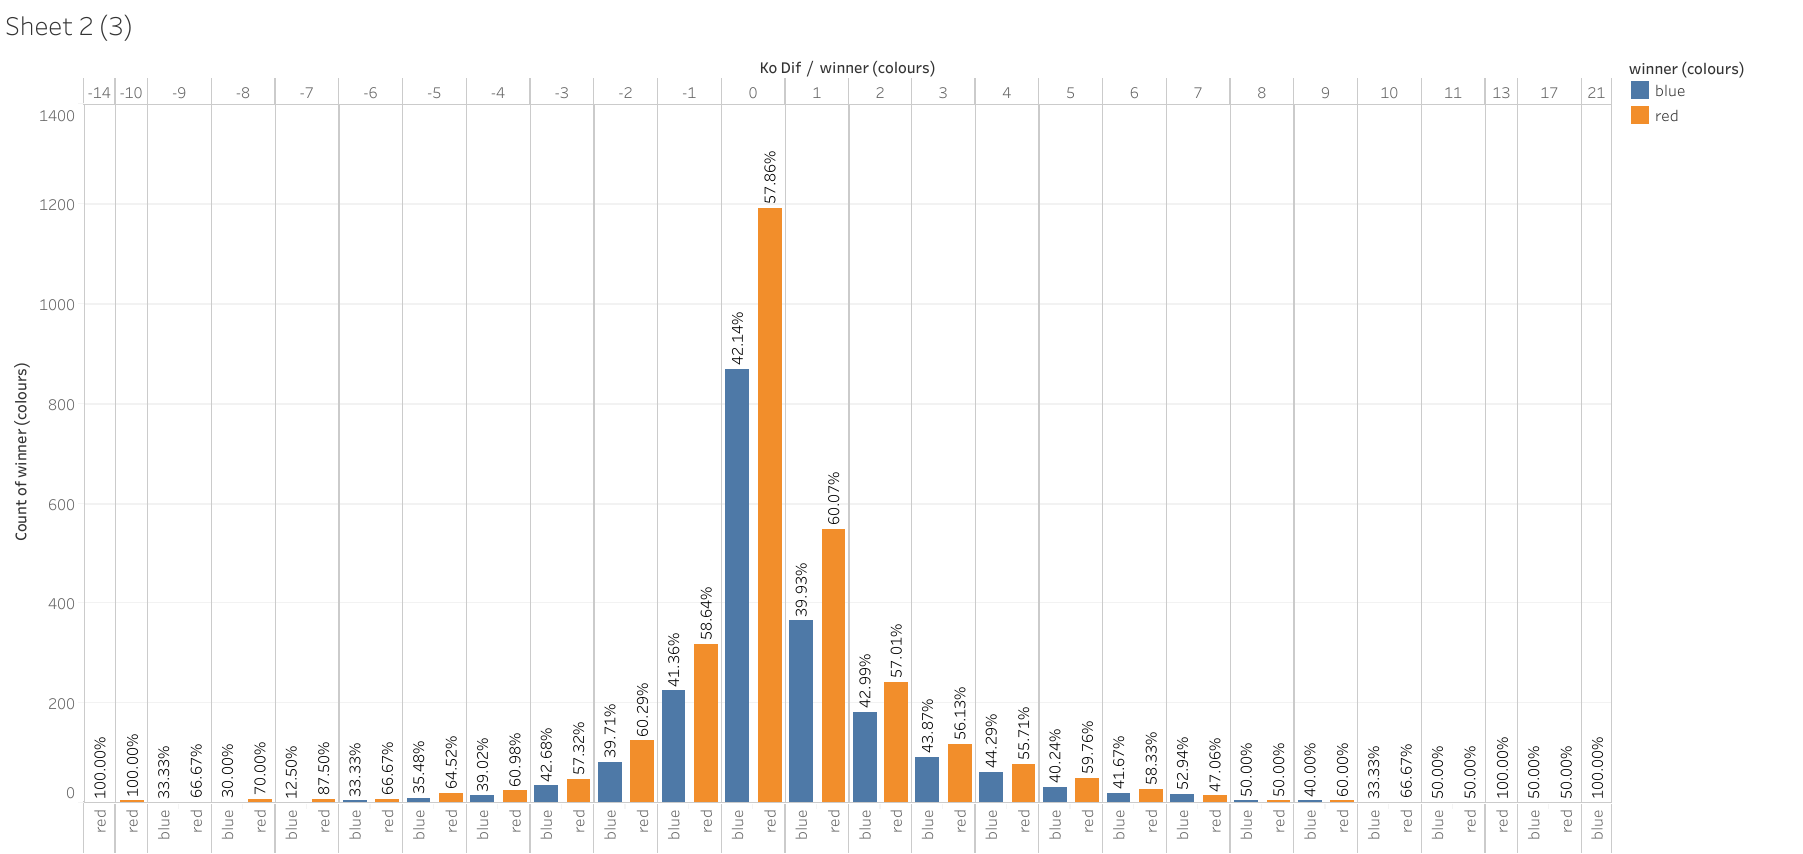

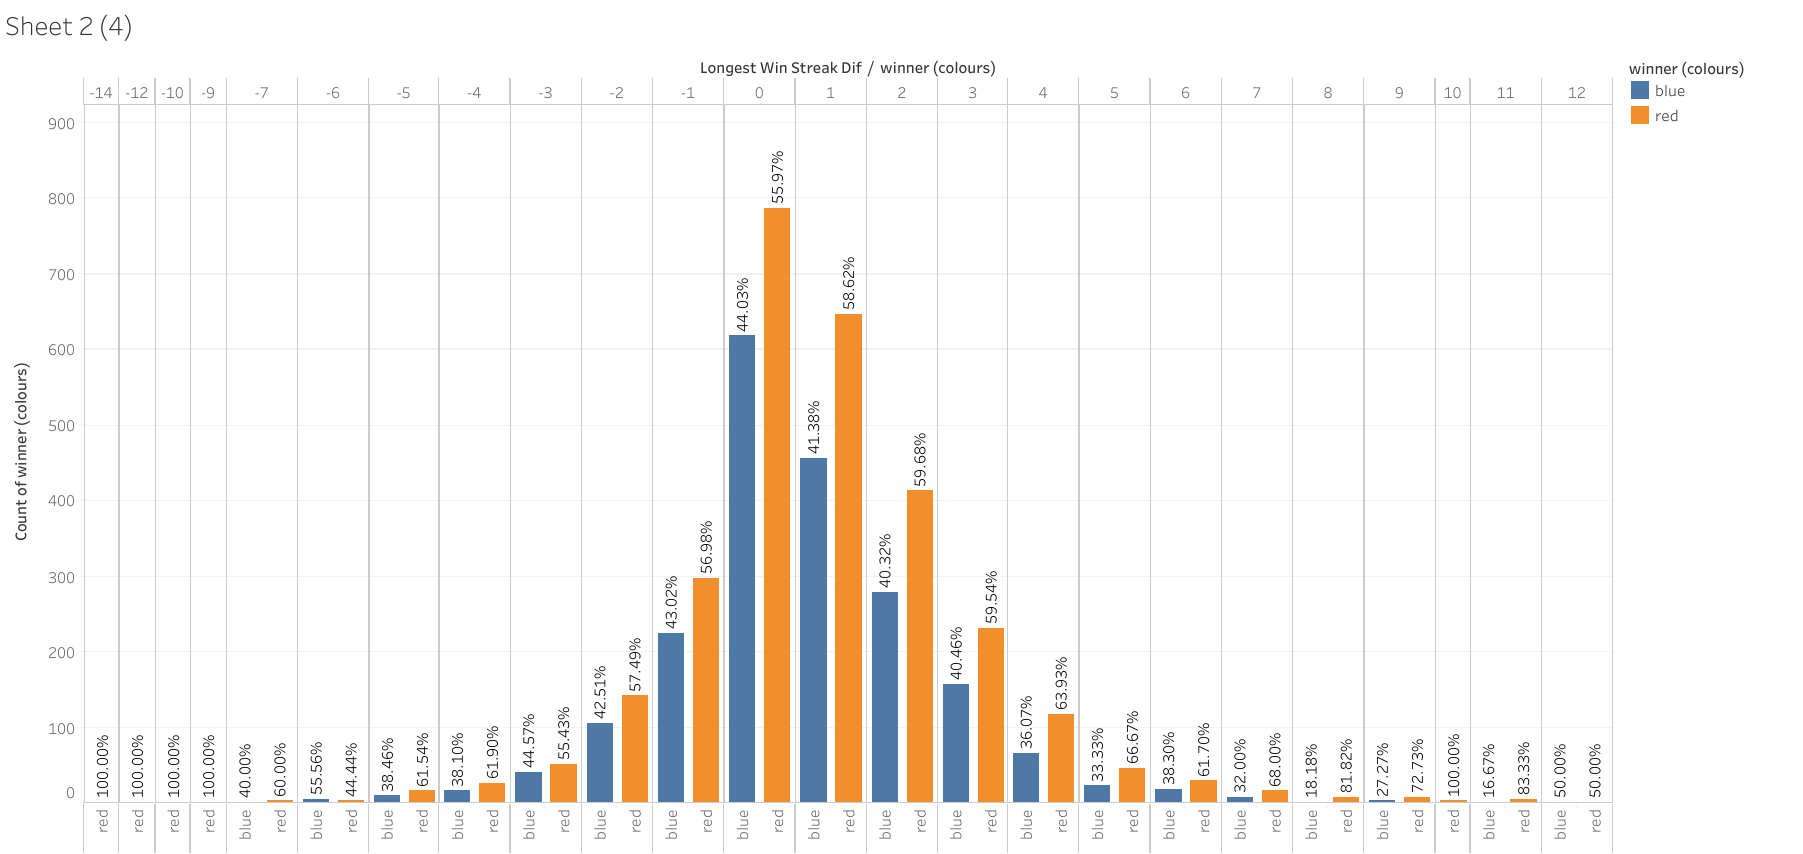

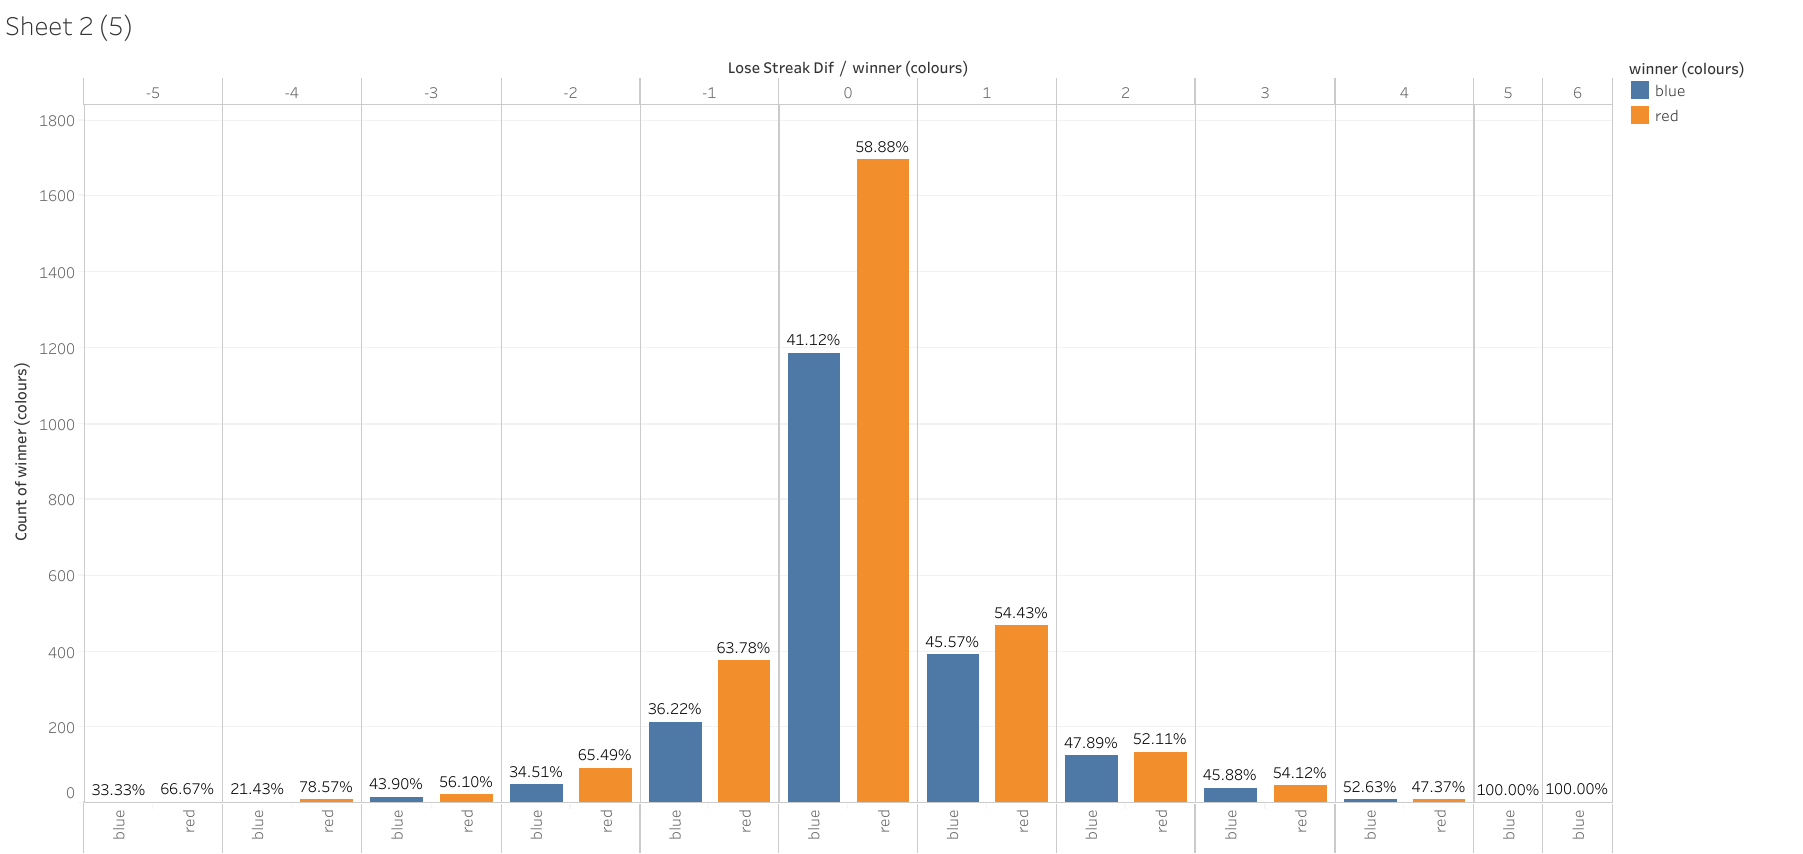

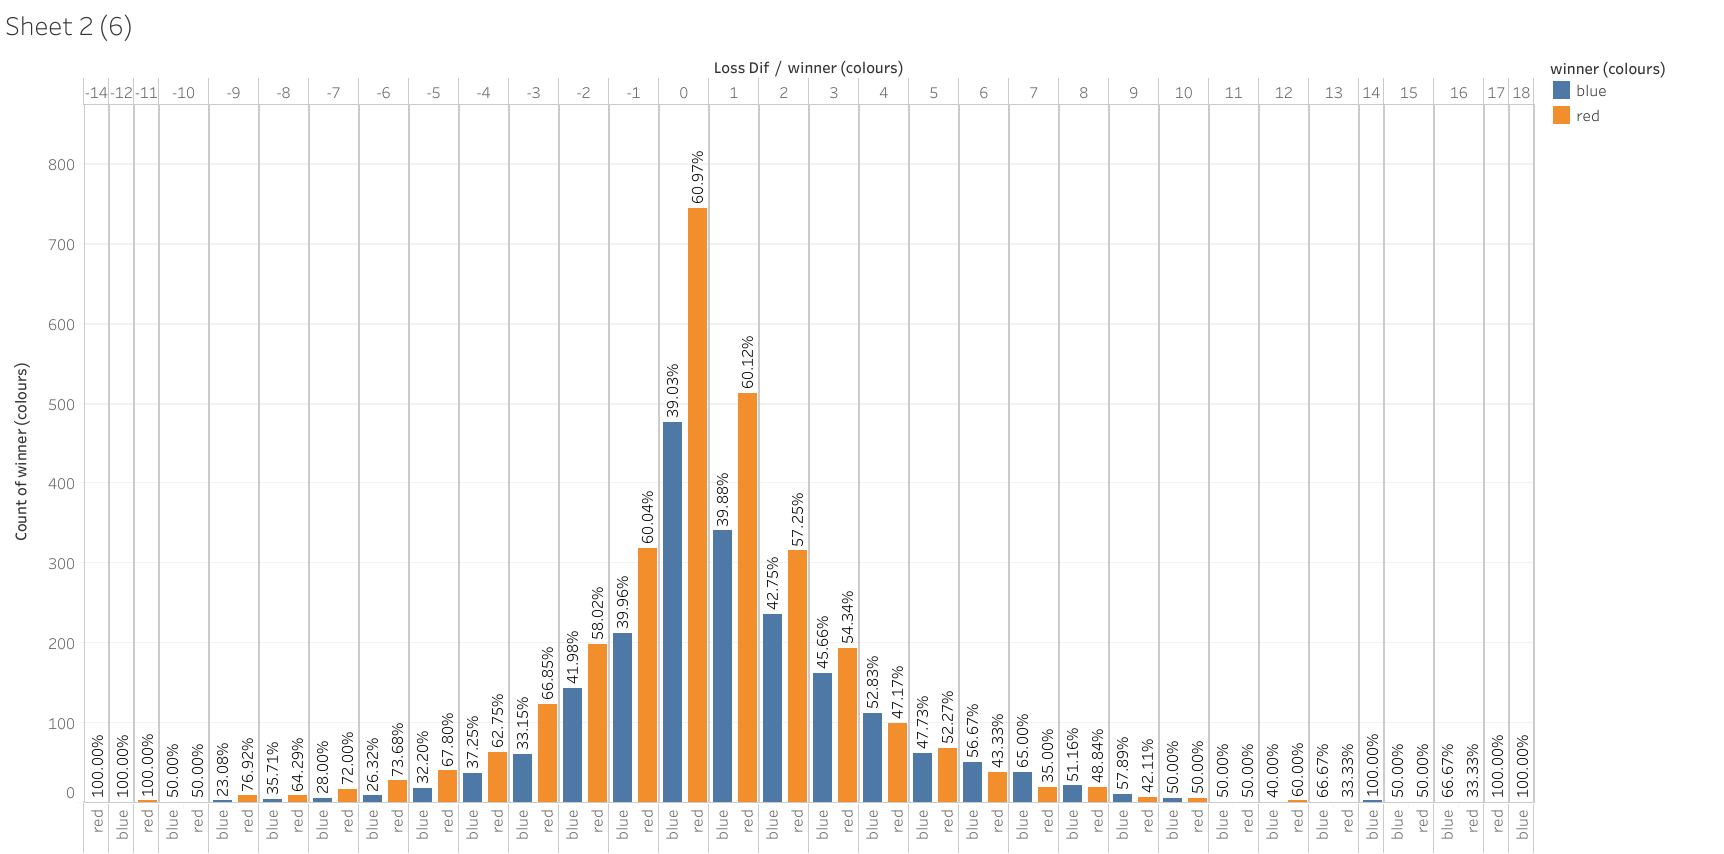

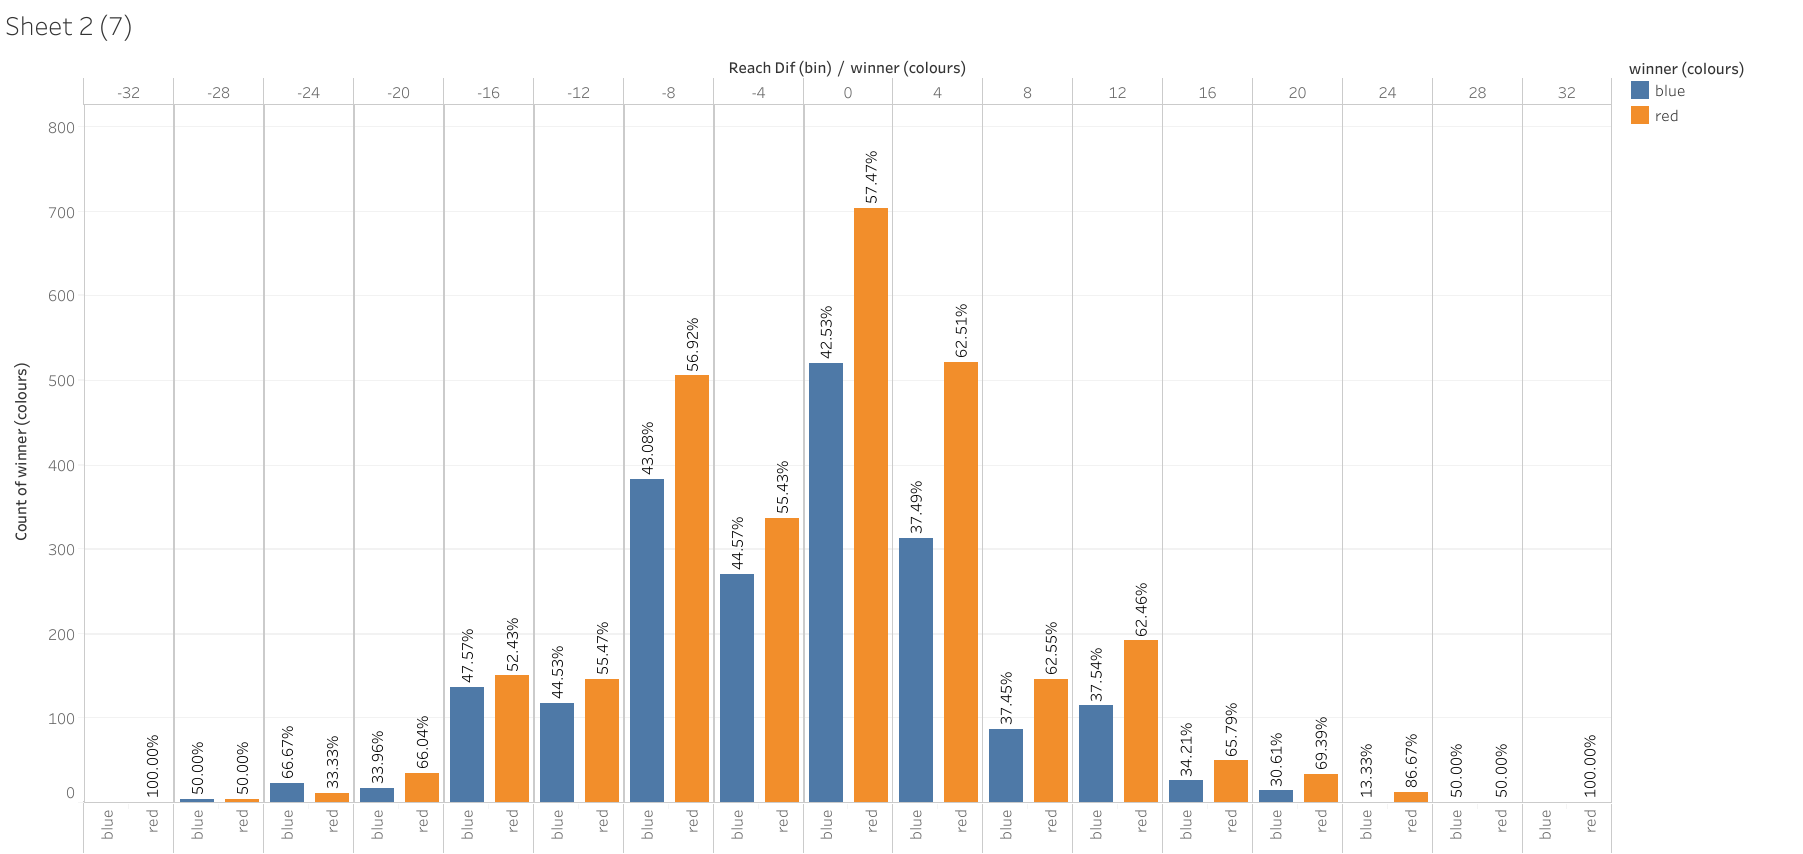

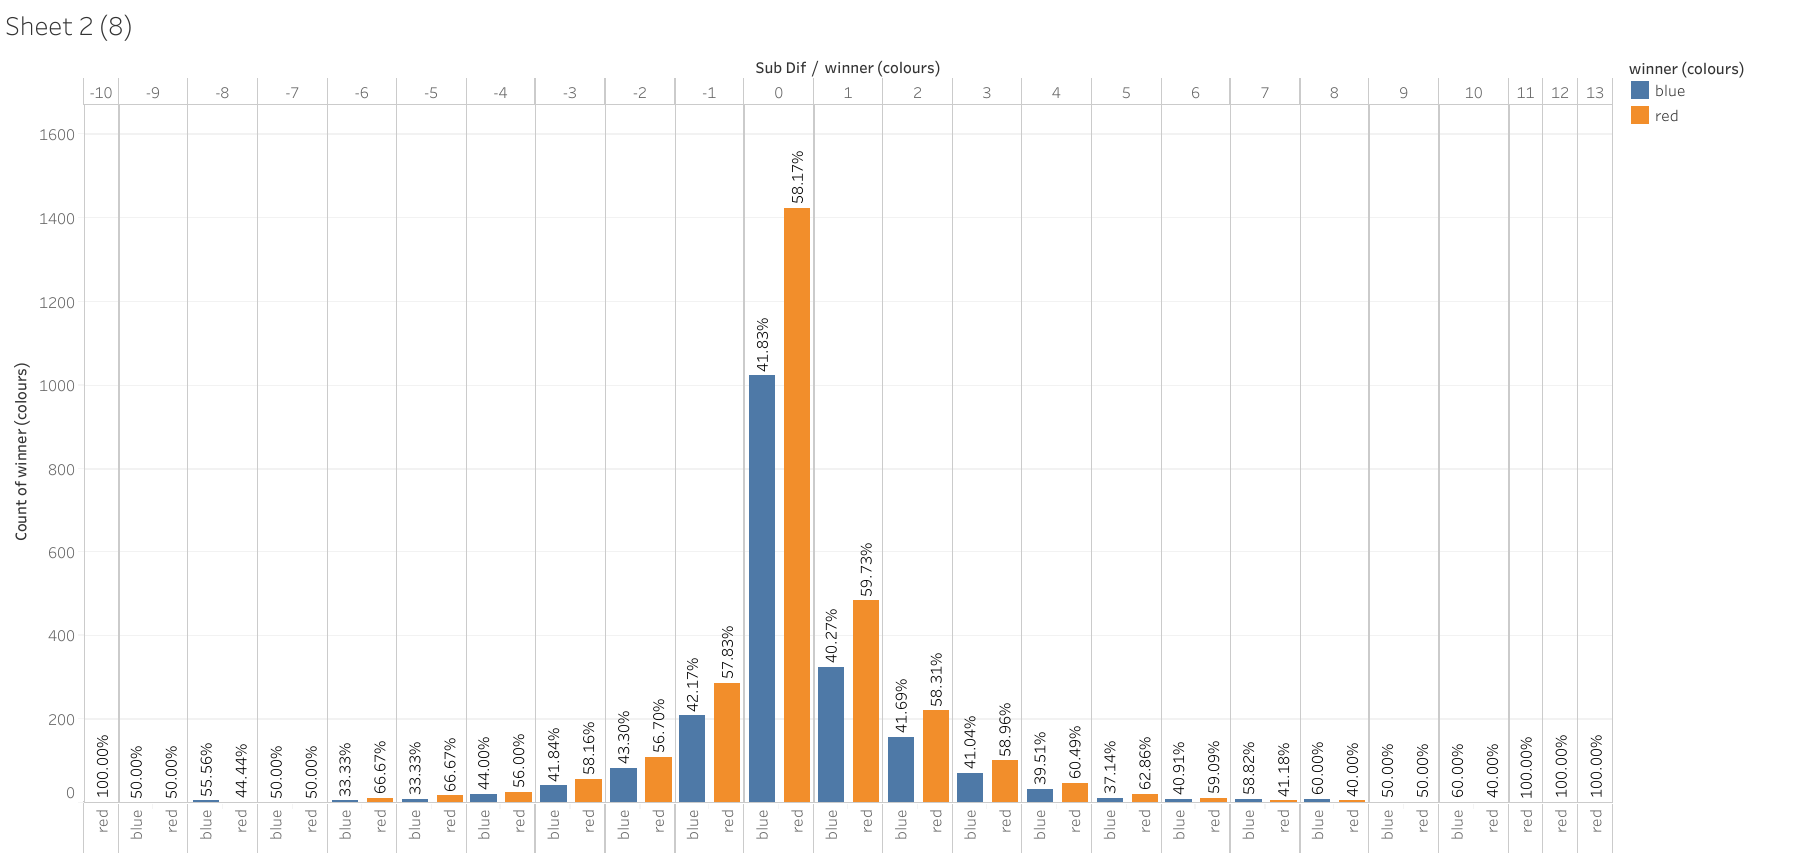

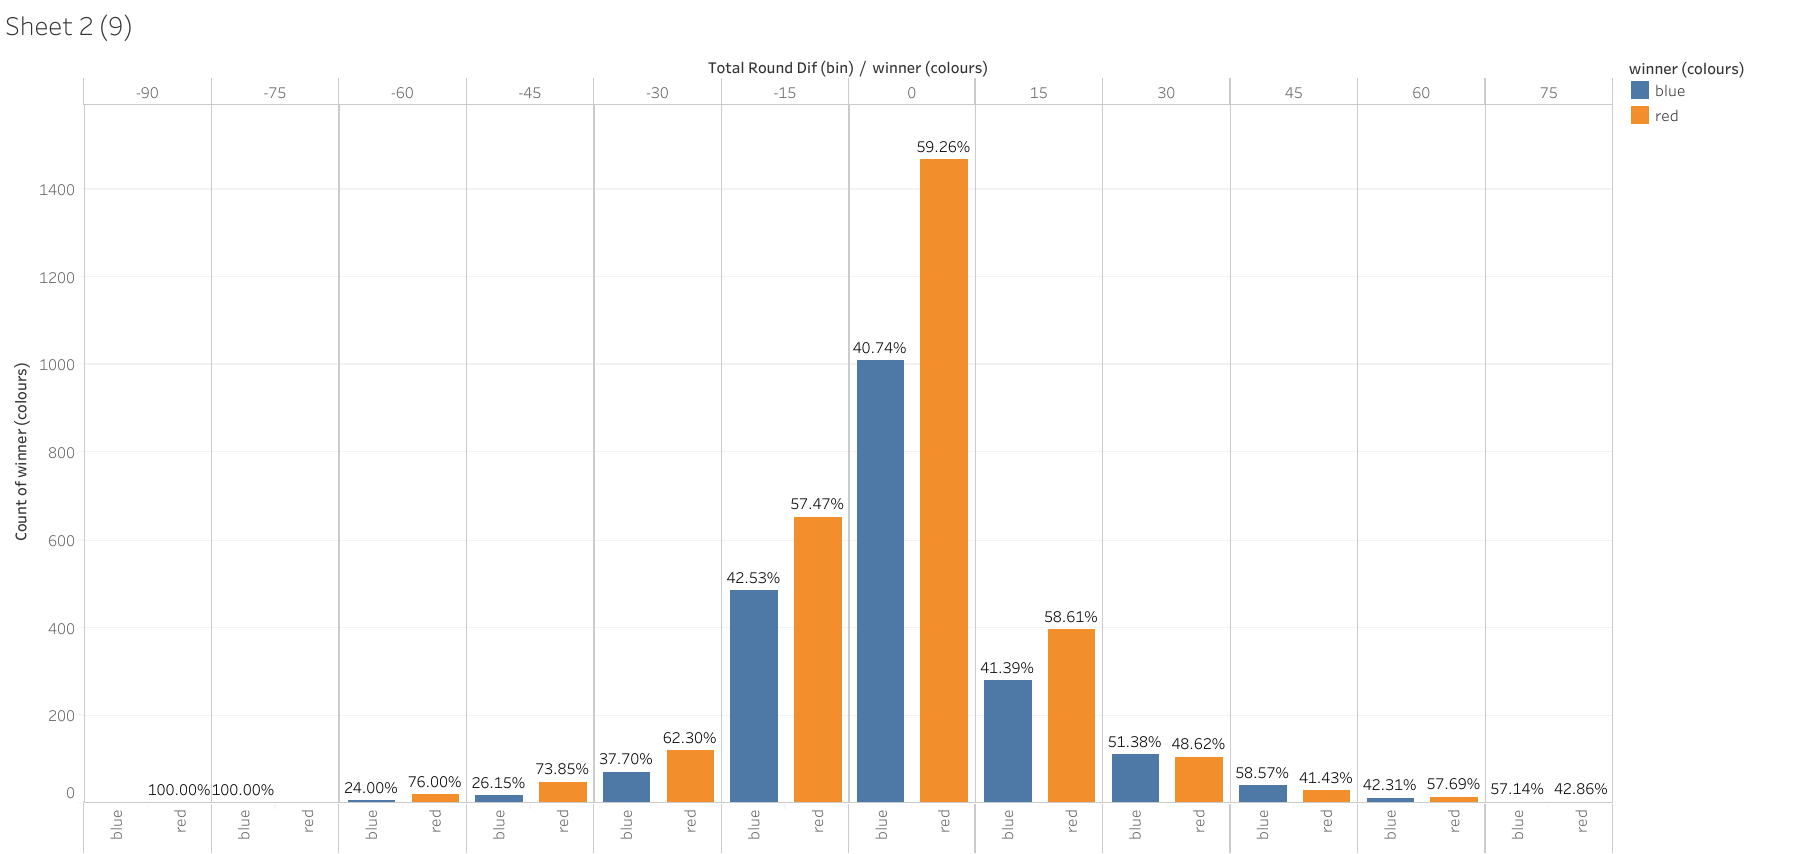

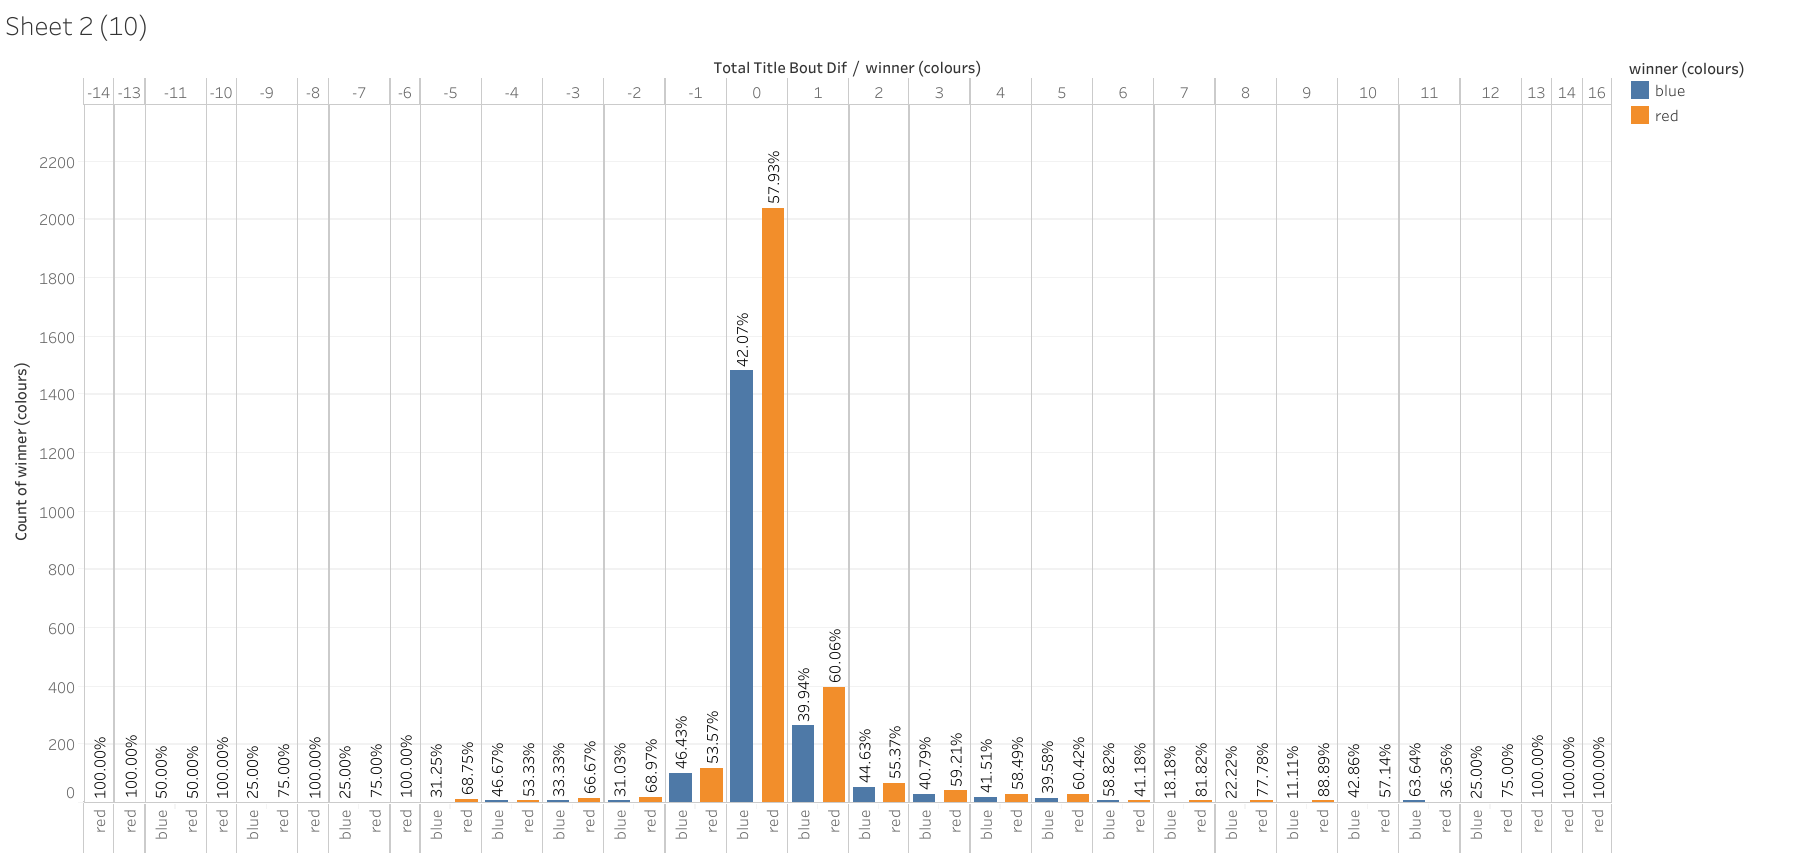

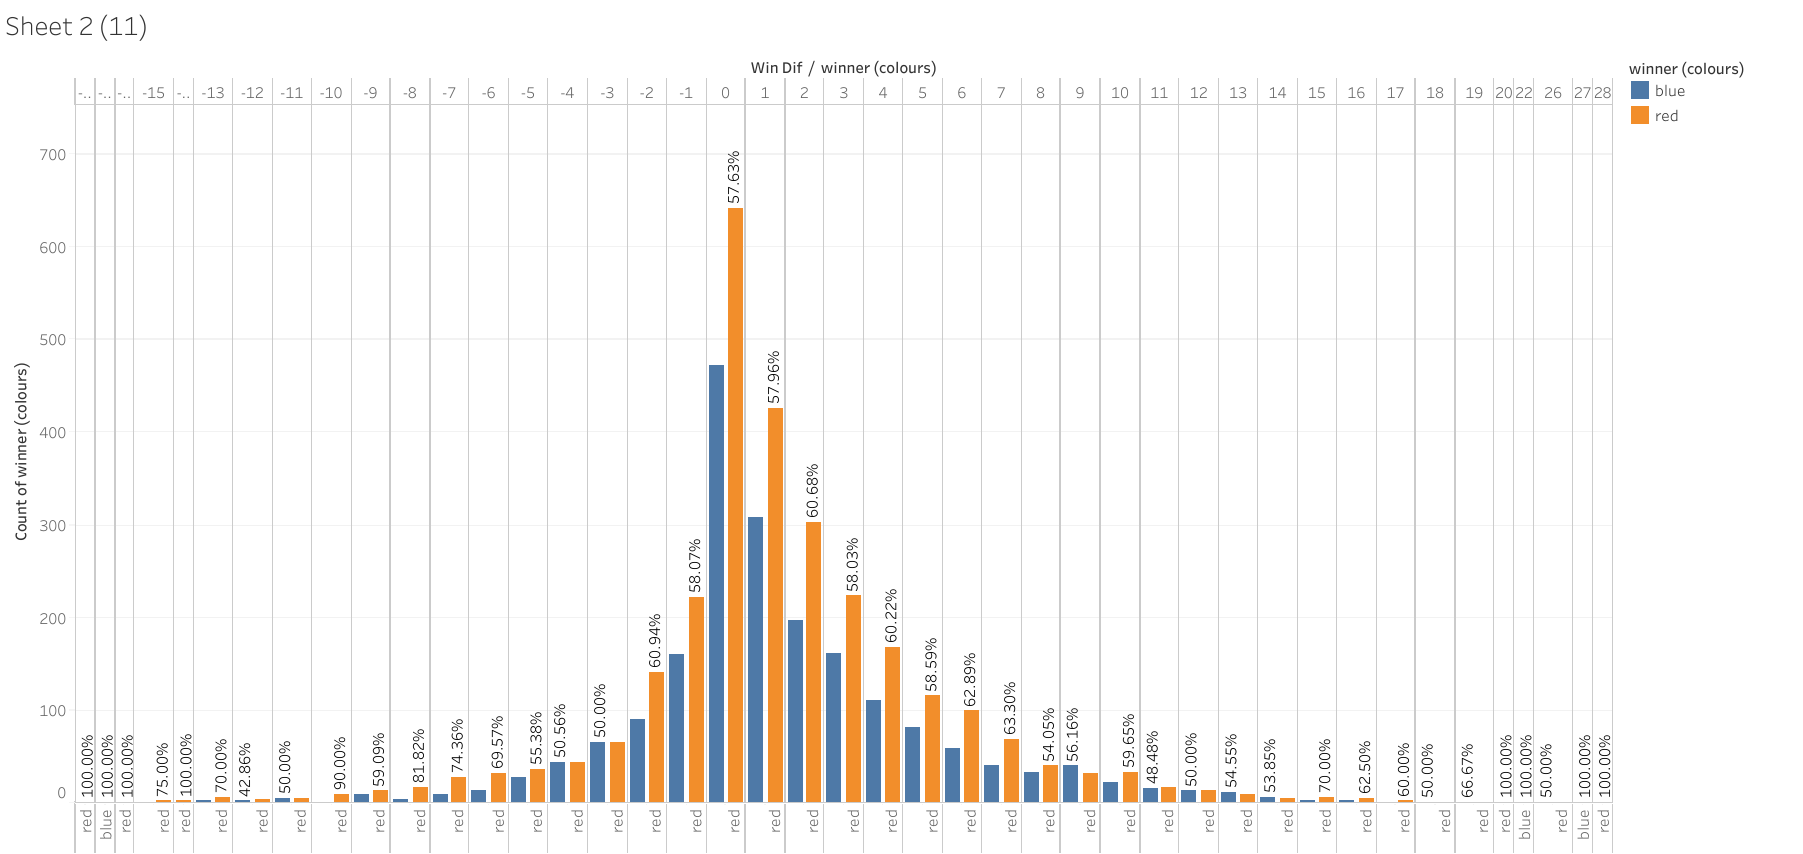

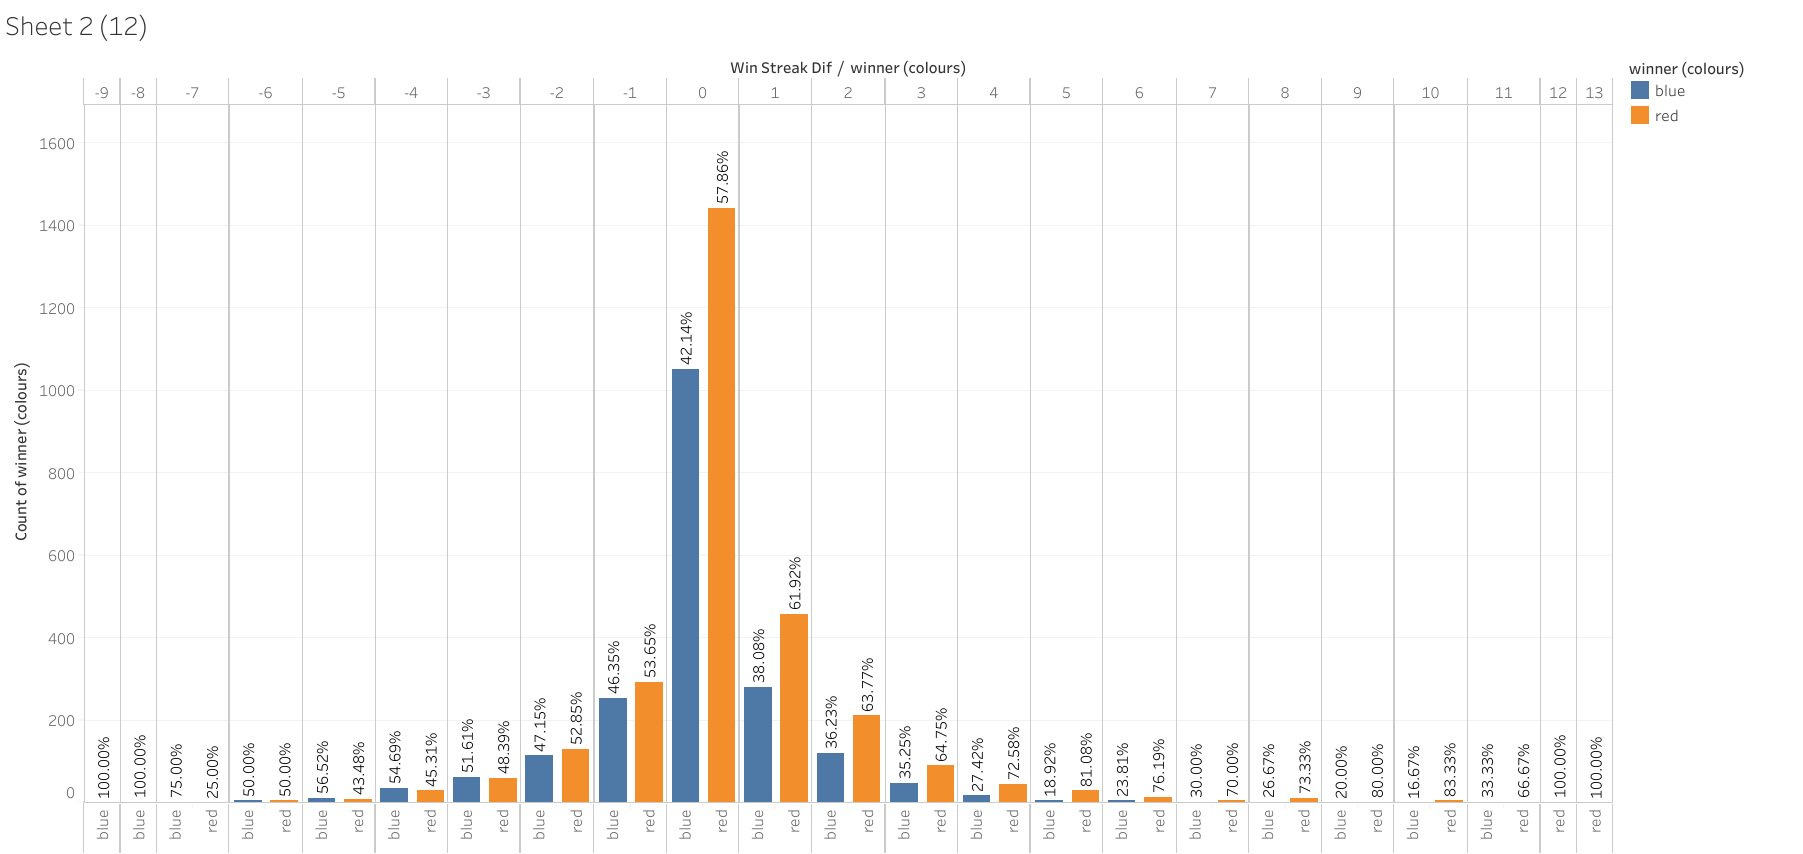

In [61]:
from IPython.display import Image, display

eda_in_tableau_path = config["eda_in_tableau_path"]

for path in eda_in_tableau_path:
    display(Image(filename=path))

In [62]:
train_set.describe()

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,Winner
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,0.155912,0.164380,0.745401,1.390657,0.680292,4.987153,0.284672,0.474745,0.290219,0.007007,0.197629,0.630365,0.583650
std,0.991309,1.658881,2.000437,4.061275,2.854274,15.951257,1.612003,2.030007,1.765248,6.368540,8.400836,5.178080,0.493025
min,-5.000000,-8.000000,-14.000000,-23.000000,-14.000000,-80.000000,-14.000000,-14.000000,-10.000000,-30.480000,-30.480000,-16.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,0.000000,0.000000,0.000000,-5.080000,-5.080000,-3.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,3.000000,2.000000,12.000000,0.000000,1.000000,1.000000,5.080000,5.080000,4.000000,1.000000
max,6.000000,12.000000,12.000000,28.000000,18.000000,84.000000,16.000000,21.000000,13.000000,25.400000,30.480000,17.000000,1.000000


From our plots above, we can conclude that red in most cases more likely to win. This is not coincidence because in the bout, usually the favorite fighter is on the red corner and the underdog is on the blue.

Something interesting happen in our Age plot. If red is younger (age_dif < 0) then they are significantly more likely to win, but when they are older than the opponent, there is almost no difference. 

From the plot we can see all the data is bell-shaped and there is no significant (isolated) outlier. Because of this we will not do IQR outlier dropping.

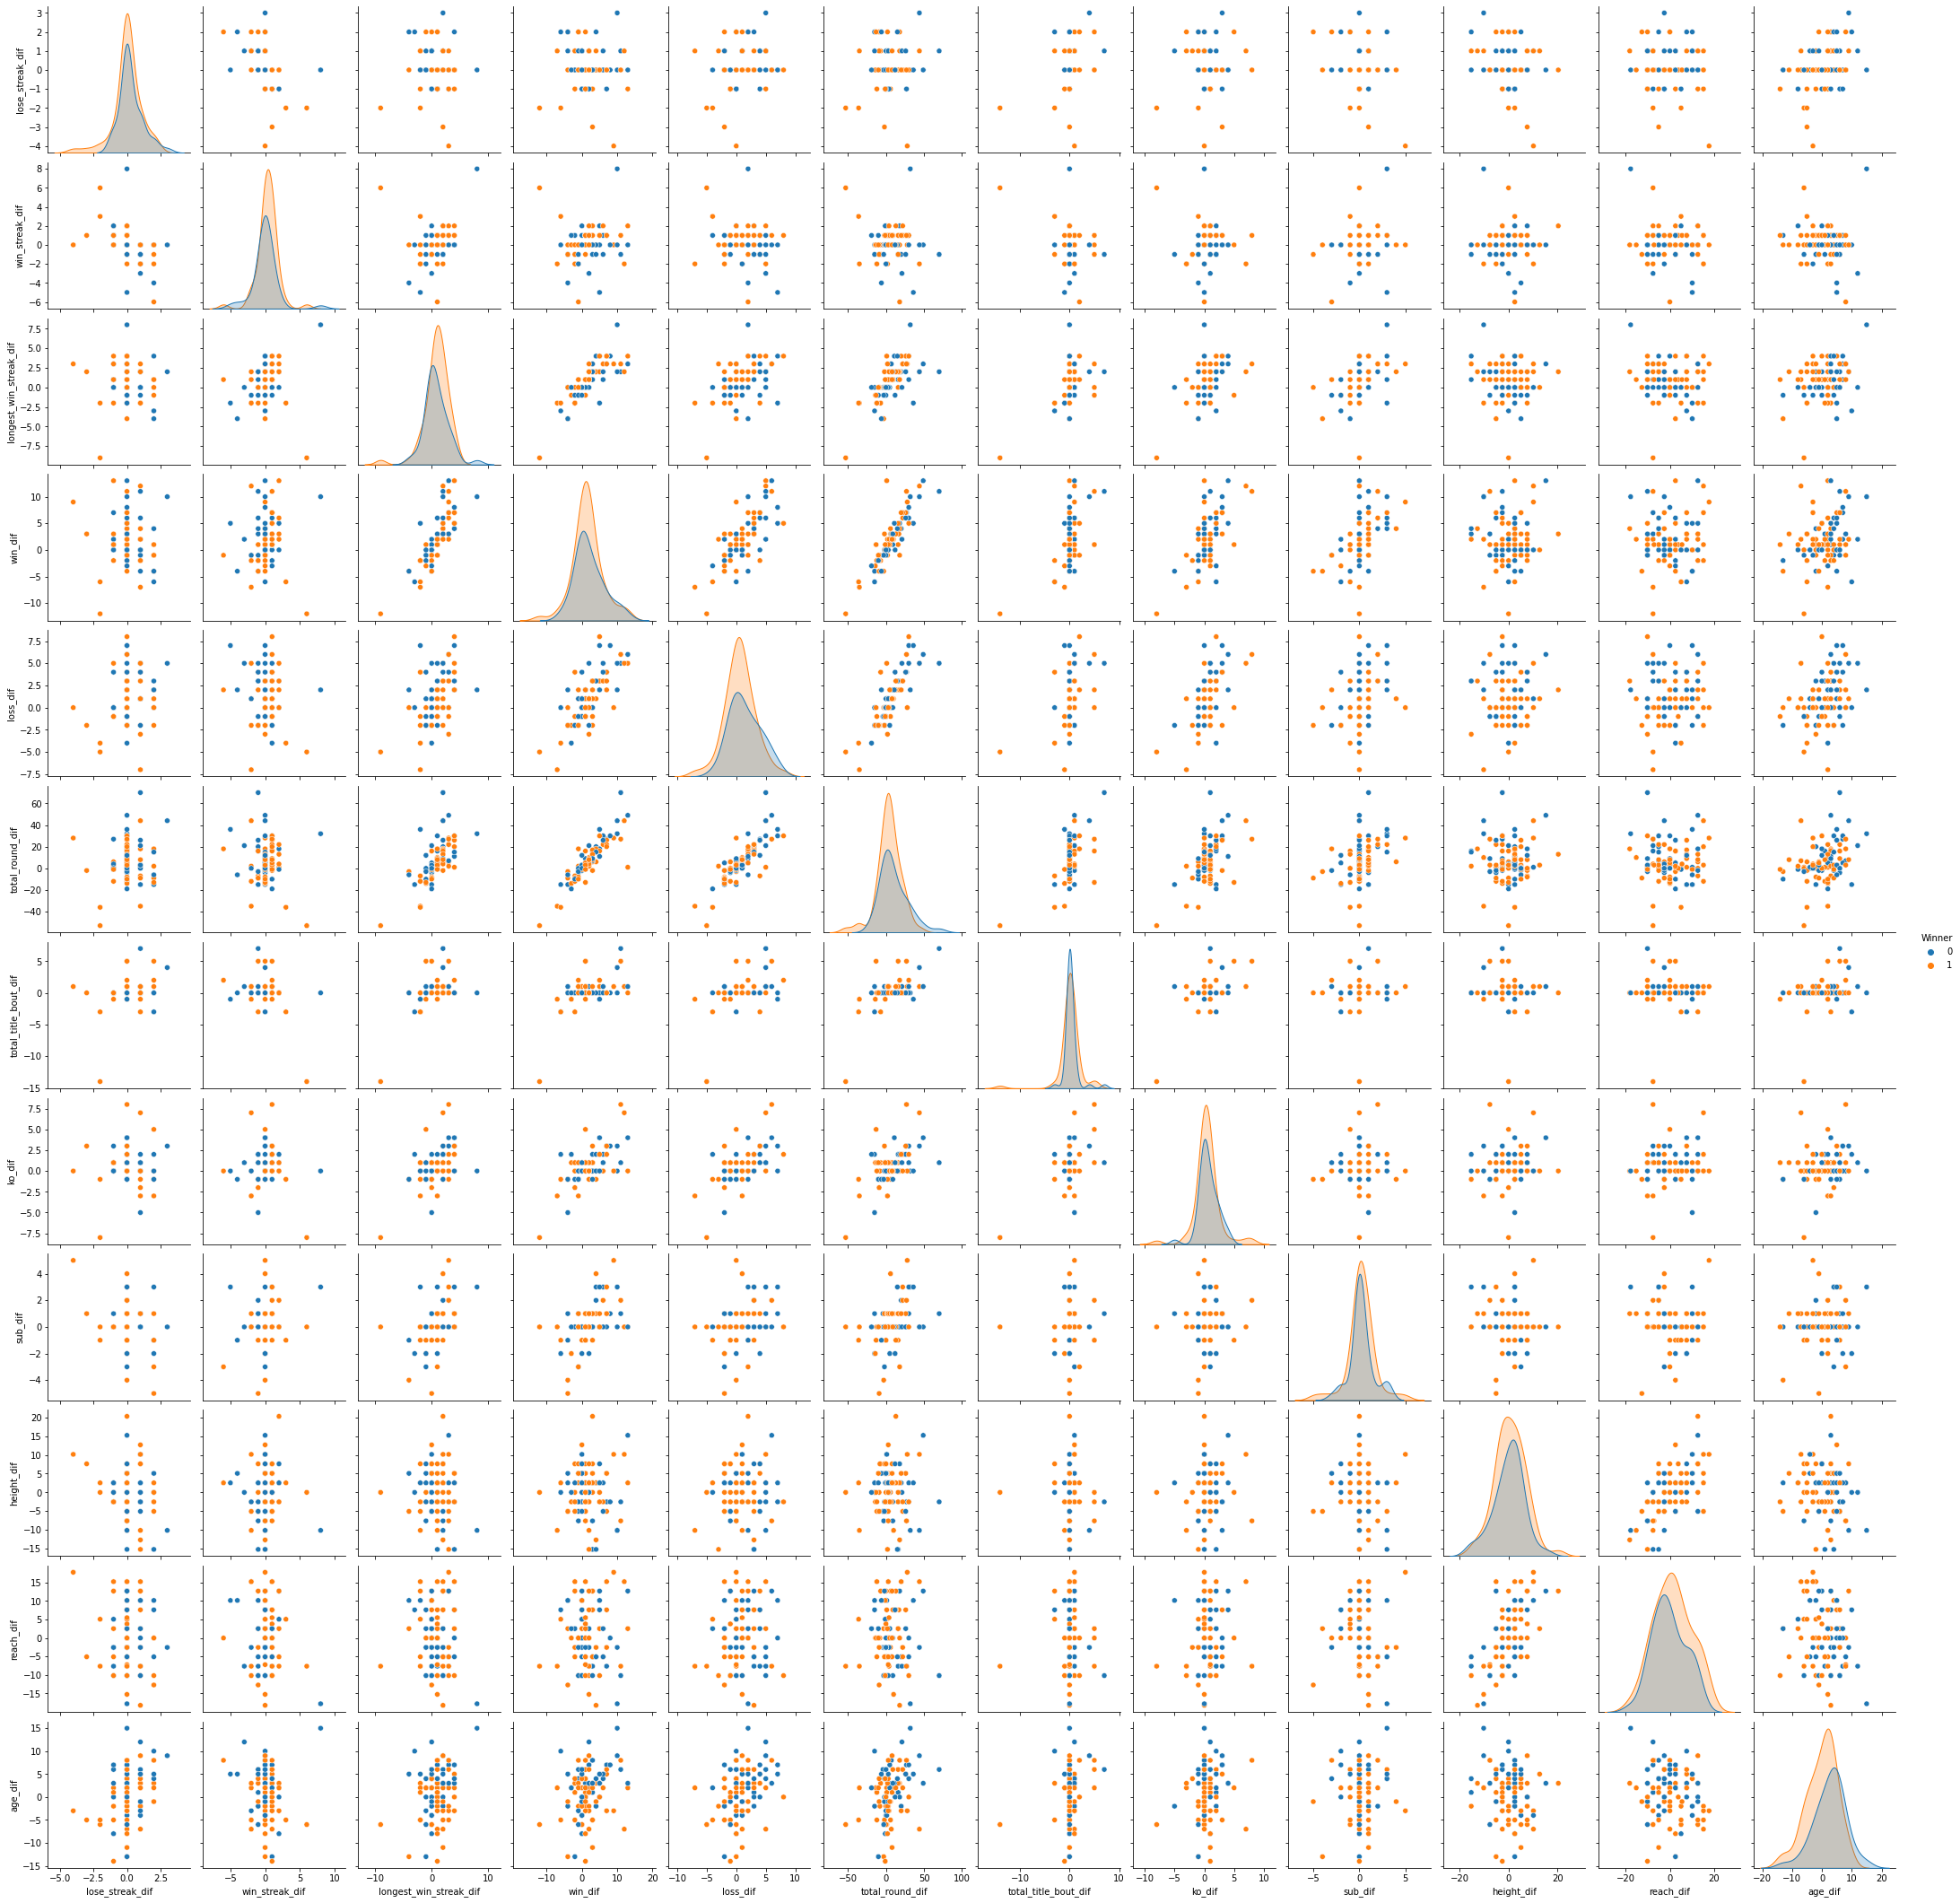

In [64]:
# now we'll see pairplot
preds = config['predictors']
target = config['target']
sns.pairplot(train_set.sample(100),hue = target)

<AxesSubplot:>

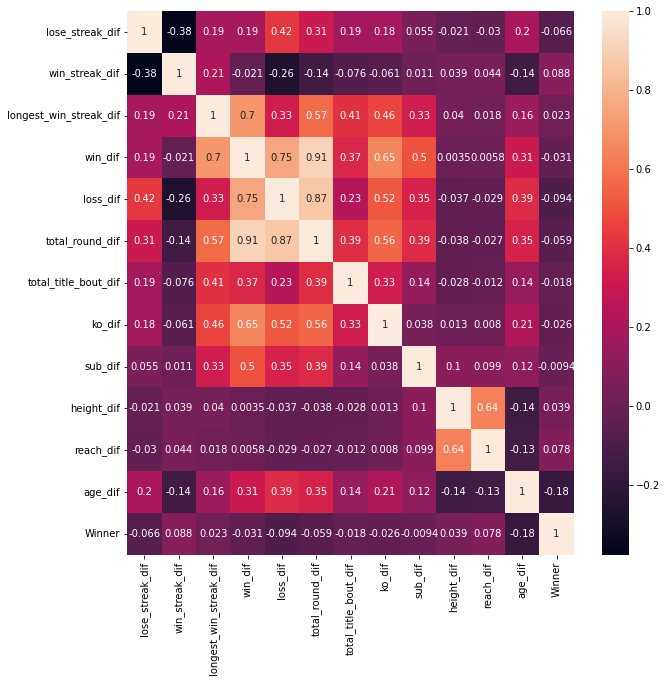

In [65]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train_set.corr(method = "pearson"), annot = True, ax = ax)

From our correlation heatmap, most feature pair don't have high correlation which means we can use all the features to our model. On the other hand our feature-target correlations suggest that our features may not give much information about our target. Also, as we can see in our pairplot, it suggests our features don't make the target distinguishable, as we could hardly make separating region on our scatter plot and our KDE plots are overlapping.

But for now let's see our data in action.